In [3]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Datasets

In [4]:
dataset1 = pd.read_csv("athlete_events.csv")
dataset2 = pd.read_csv("noc_regions.csv")

# Check if there are any NaN values

In [5]:
print(f"NaN values in dataset1:\n{dataset1.isnull().sum()}")
print(f"NaN values in dataset2:\n{dataset2.isnull().sum()}")

NaN values in dataset1:
ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64
NaN values in dataset2:
NOC         0
region      3
notes     209
dtype: int64


# Handling Missing Data (NaN values)

In [7]:
dataset1 = dataset1.fillna(value=0)
dataset2 = dataset2.fillna(value=0)

# Check if there are any remaining NaN values

In [8]:
print(f"NaN values in dataset1:\n{dataset1.isnull().sum()}")
print(f"NaN values in dataset2:\n{dataset2.isnull().sum()}")

NaN values in dataset1:
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64
NaN values in dataset2:
NOC       0
region    0
notes     0
dtype: int64


# Connect to the MySQL database

In [9]:
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="olympics"
)

In [10]:
# Updated Function to Save a DataFrame to SQL
def save_to_sql(df, table_name, connection):
    
#The cursor acts as a bridge between your Python program and the database.
    cursor = connection.cursor()
    
    # Create table if it doesn't exist
    cursor.execute(f"CREATE TABLE IF NOT EXISTS {table_name} ({', '.join([f'{col} VARCHAR(255)' for col in df.columns])});")
    
    # Insert data into the table
    for i, row in df.iterrows():
        placeholders = ", ".join(["%s"] * len(row))
        insert_query = f"INSERT INTO {table_name} VALUES ({placeholders});"
        cursor.execute(insert_query, tuple(row))
        
    connection.commit()
    print(f"Data saved to table {table_name}.")
    
save_to_sql(dataset1, "athletes", connection)  
save_to_sql(dataset2, "noc", connection)

Data saved to table athletes.
Data saved to table noc.


# Load Data into Pandas DataFrame & Verifying the dataset

In [11]:
# Query to fetch data from the 'athletes' table
query_athletes = 'SELECT * FROM athletes;'
athletes_df = pd.read_sql(query_athletes, connection)  #Load the data into a pandas DataFrame

# Query to fetch data from the 'noc' table
query_noc = 'SELECT * FROM noc;'
noc_df = pd.read_sql(query_noc, connection)

# Check the first few rows to ensure the data is loaded correctly
print(athletes_df.head())
print(noc_df.head())

C:\Users\pravi\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


  ID                      Name Sex   Age Height Weight            Team  NOC  \
0  1                 A Dijiang   M  24.0  180.0   80.0           China  CHN   
1  2                  A Lamusi   M  23.0  170.0   60.0           China  CHN   
2  3       Gunnar Nielsen Aaby   M  24.0    0.0    0.0         Denmark  DEN   
3  4      Edgar Lindenau Aabye   M  34.0    0.0    0.0  Denmark/Sweden  DEN   
4  5  Christine Jacoba Aaftink   F  21.0  185.0   82.0     Netherlands  NED   

         Games  Year  Season       City          Sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball     0  
1      Judo Men's Extra-Lightweight     0  
2           Football Men's Football     0  


C:\Users\pravi\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


# Verifying rows and columns

In [12]:
athletes_df.shape

(271116, 15)

In [13]:
noc_df.shape

(230, 3)

# Joining datasets/dataframes


To easily recognise the Country associated with a particular NOC (National Olympic Committee). Using Left join

In [15]:
athletes_df = dataset1.merge(dataset2, how = 'left', on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,China,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,China,0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Denmark,0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Netherlands,0


In [16]:
athletes_df.shape

(271116, 17)

# Making column consistent

In [17]:
athletes_df = athletes_df.rename(columns={'region': 'Region', 'notes': 'Notes'})
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,China,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,China,0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Denmark,0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Netherlands,0


# Count & remove duplicate rows

In [21]:
num_duplicates = athletes_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 1385


In [23]:
athletes_df = athletes_df.drop_duplicates()

In [25]:
num_duplicates = athletes_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


# EDA - Exploratory Data Analysis

## Indian Athletes and Their Medal Records from India's First Olympic Participation Year

In [31]:
first_year = athletes_df.query('Team == "India"')['Year'].astype(int).min()
first_year_athletes = athletes_df.query('Team == "India" and Year == @first_year')
print(f"India's first Olympic participation year: {first_year}")
print("Athletes who participated in that year along with their medal records:")
print(first_year_athletes[['Name', 'Medal']])

India's first Olympic participation year: 1900
Athletes who participated in that year along with their medal records:
                                      Name   Medal
193364  Norman Gilbert Pritchard (-Trevor)       0
193365  Norman Gilbert Pritchard (-Trevor)       0
193366  Norman Gilbert Pritchard (-Trevor)  Silver
193367  Norman Gilbert Pritchard (-Trevor)       0
193368  Norman Gilbert Pritchard (-Trevor)  Silver


A lone athlete Norman Pritchard represented the country and won two silver medals in athletics in 1900.

## India's medal distribution by Year

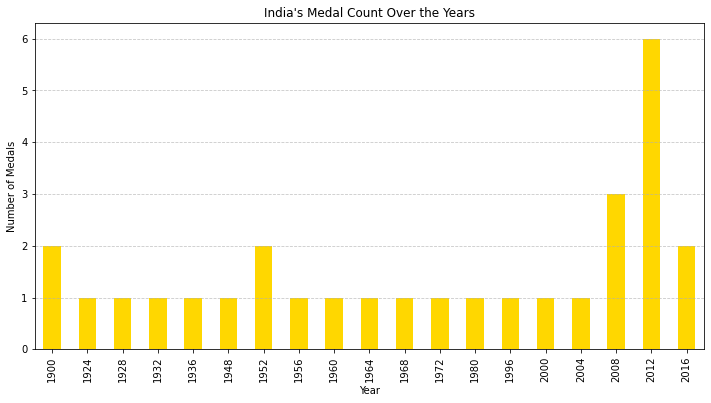

In [36]:
medal_count = (
    athletes_df.query('Team == "India" and Medal in ["Gold", "Silver", "Bronze"]')
    .drop_duplicates(subset=['Year', 'Event', 'Medal'])
    .groupby('Year')['Medal']
    .count()
)
plt.figure(figsize=(12, 6))
medal_count.plot(kind='bar', color='gold')
plt.title("India's Medal Count Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- India has won the highest no. of medals in 2012
- Constantly single medal each season from 1956 - 2004

## Top Sports by Participation

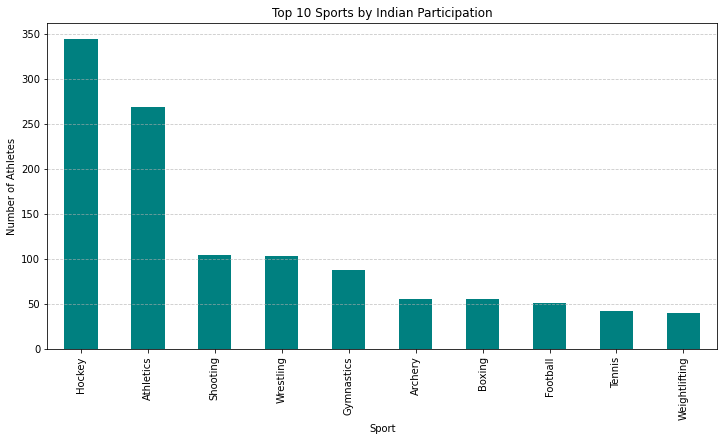

In [37]:
top_sports = (athletes_df.query('Team == "India"')
              .groupby('Sport')['ID'].count()
              .sort_values(ascending=False)
              .head(10))

plt.figure(figsize=(12, 6))
top_sports.plot(kind='bar', color='teal')
plt.title("Top 10 Sports by Indian Participation")
plt.xlabel("Sport")
plt.ylabel("Number of Athletes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Hockey has the highest participation followed by Athletics and Shooting.

## Year-Wise Participation

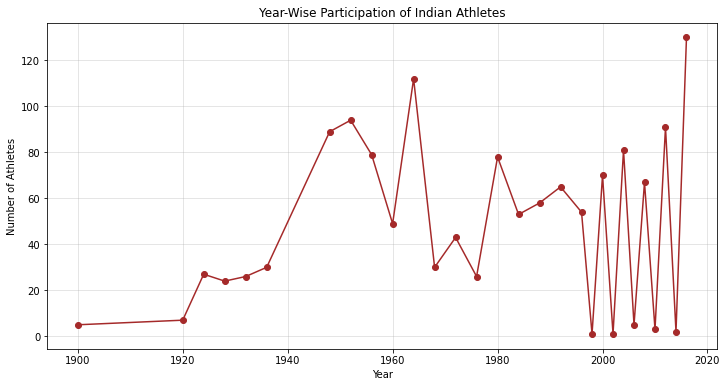

In [41]:
participation = athletes_df.query('Team == "India"').groupby('Year')['ID'].count()

plt.figure(figsize=(12, 6))
participation.plot(kind='line', marker='o', color='brown')
plt.title("Year-Wise Participation of Indian Athletes")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.grid(alpha=0.4)
plt.show()

Analyzes how the number of Indian athletes has been growing and reducing over time.

## Top 10 Countries by Number of Athletes

In [42]:
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: Team, dtype: int64

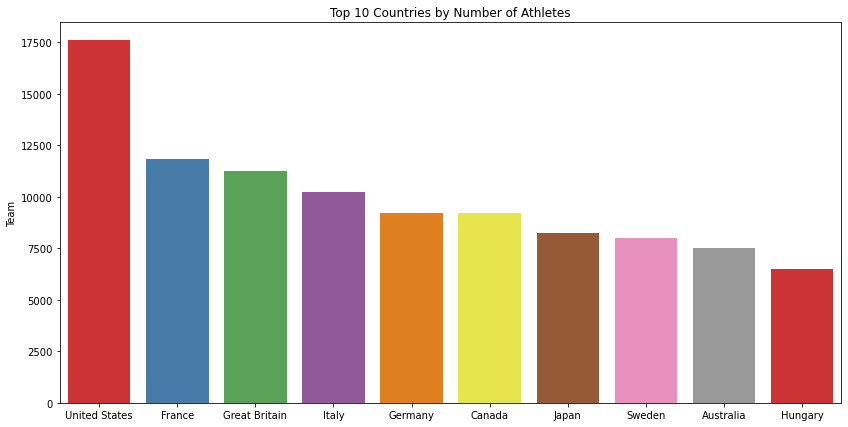

In [43]:
plt.figure(figsize=(14,7))
plt.title('Top 10 Countries by Number of Athletes')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette = 'Set1');

- US topped the highest participation list
- Cumulatively European athletes has particiapted the most

## Age-wise distribution of the athletes

Histogram represeting the distribution of ages among athletes, highlighting the number of participants in each age range.

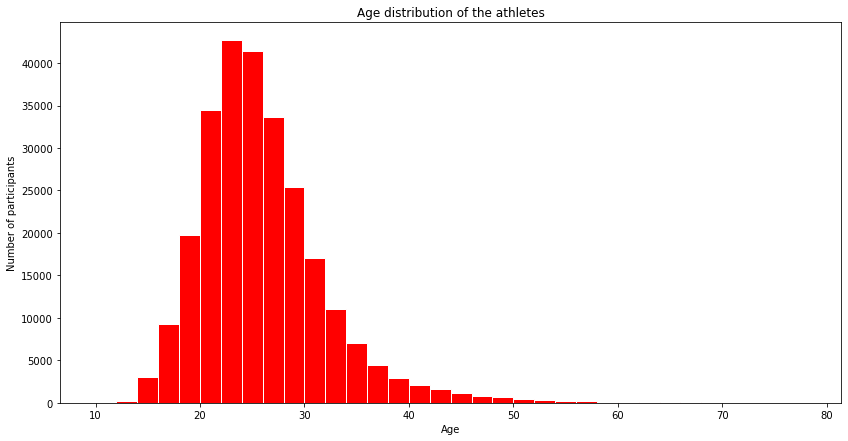

In [44]:
plt.figure(figsize=(14, 7))
plt.title("Age distribution of the athletes")
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(athletes_df.Age, bins = np.arange(10,80,2), color='red', edgecolor = 'white');

- Most athletes were found in the age range of 20-30 years
- Young athelets qualifies for Olmypic Games the most

## No. of sports in Summer & Winter Olympic Games

This pie chart illustrates the distribution of unique sports across the Winter and Summer seasons.

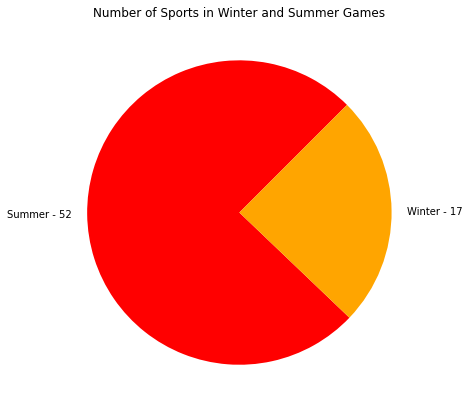

In [45]:
sports_count_per_season = athletes_df.groupby('Season')['Sport'].nunique()

plt.figure(figsize=(7, 7))
plt.pie(sports_count_per_season, 
        labels=[f'{label} - {count}' for label, count in sports_count_per_season.items()], 
        startangle=45, 
        colors=['red', 'orange'])
plt.title('Number of Sports in Winter and Summer Games')
plt.show()

- More games are considered in Summer games
- This chart helps to understand the scope of events in each season.

## Count of Male and Female participants

This pie chart visualizes the distribution of athletes by gender, showing the proportion of each gender in the dataset.

In [46]:
gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    195353
F     74378
Name: Sex, dtype: int64

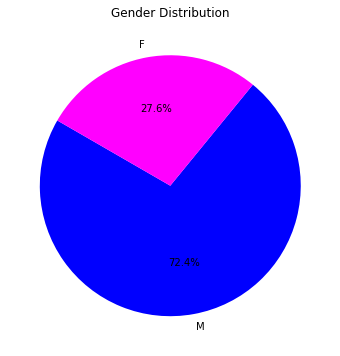

In [47]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=150, colors=['blue', 'magenta']);

- Male athletes are maximum from start till date.
- From the pie chart we can analyze the trends in gender diversity in sports.

## Trend of Female Athletes Over Time in Both Summer and Winter Olympics

<Figure size 3600x1800 with 0 Axes>

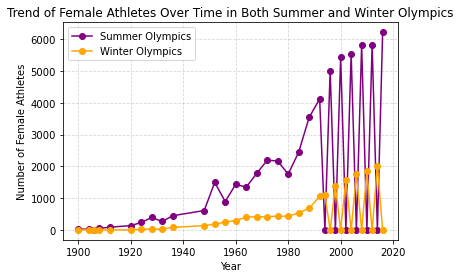

In [63]:
womenOlympics = athletes_df[athletes_df.Sex == 'F']

part = womenOlympics.groupby(['Year', 'Season'])['Sex'].count().unstack(fill_value=0)

plt.figure(figsize=(50, 25))
part.plot(kind='line', marker='o', linestyle='-', color=['purple', 'orange'])
plt.title('Trend of Female Athletes Over Time in Both Summer and Winter Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Female Athletes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Summer Olympics', 'Winter Olympics'])
plt.show()